En este archivo Phyton vamos a realizar la carga y tratamiento de los archivos proporcionados por la empresa Pontia World.

# CARGA Y TRATAMIENTO DE DATOS CON PHYTON

#📚Importación de librerias Phyton

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from os import sep
import json
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 🕵🏻 Exploración de **emocion.json**

In [ ]:
ruta_json = '/content/drive/MyDrive/PROYECTO JUPITER EMOCIONES/emocion.json'

# Leer el JSON en un DataFrame
df = pd.read_json(ruta_json)

# Mostrar el DataFrame para verificar
print(df)
df.shape

**Transformar el DataFrame**

Objetivo: Convertir las 35,885 columnas en filas, con columnas separadas para t_id, emocion, y tiempo_recogida.

Acción: Transponer el DataFrame con df.T para que cada fotografía sea una fila, y renombrar las columnas.

In [ ]:
# Transponer para que columnas sean filas
df_transformado = df.T

# Renombrar columnas (opcional, para claridad)
df_transformado.columns = ['t_id', 'emocion', 'tiempo_recogida']

# Mostrar el resultado
df_transformado.head()

**Exploración inicial de los datos**

Objetivo:
1.Analizar la distribución de emocion y tiempo_recogida para detectar posibles errores (ej. nulos, valores inválidos).
2.Traducir las emociones a castellado, ya que nuestra empresa es Española

1.   Analizar la distribución de emocion y tiempo_recogida para detectar posibles errores (ej. nulos, valores inválidos).
2.   Traducir las emociones a castellado, ya que nuestra empresa es Española
3.   Entender y trabajar la columnda **tiempo_recogida** para sacar conclusiones y entender coherencia de los datos



In [ ]:
# Exploración inicial

# Exploración

print("Frecuencia de emociones:")
print(df_transformado["emocion"].value_counts())

print("\nEstadísticas de tiempo_recogida:")
print(df_transformado["tiempo_recogida"].describe())

# Diccionario de traducción
traduccion_emociones = {
    'happy': 'feliz',
    'neutral': 'neutral',
    'sad': 'triste',
    'fear': 'miedo',
    'angry': 'enojado',
    'surprise': 'sorpresa',
    'disgust': 'asco'
}
# Cambio de idioma de las emociones
df_transformado['emocion'] = df_transformado['emocion'].replace(traduccion_emociones)
df_transformado.shape



In [ ]:
# Convertir a formato legible
primera_fecha=pd.Timestamp("7:00 09-01-2022")
df_transformado["Fecha y hora foto"]=primera_fecha + pd.to_timedelta(df_transformado["tiempo_recogida"], unit="h") # no se podia sumar directamente, usamos
#pd.to_timedelta() convierte valores numéricos (como enteros o flotantes) en intervalos de tiempo (timedelta), que luego se pueden sumar
#convertimos el tiempo de recogida a entero
df_transformado['tiempo_recogida'] = df_transformado['tiempo_recogida'].astype(int)
df_transformado.dtypes
#renombramos el df
df_emocion=df_transformado
df_emocion.head(40000)


#👀 Exploración de valoraciones.json

In [ ]:
# Importo el json "valoraciones" localizado en la carpeta compartida de PROYECTO JÚPITER

import json

ruta_json = '/content/drive/MyDrive/PROYECTO JUPITER EMOCIONES/Colabs/Iñigo/valoraciones.json'

# Abrir y cargar el archivo JSON
with open(ruta_json, 'r') as archivo:
    datos = json.load(archivo)

# Mostrar contenido del JSON - vemos que la clase es un diccionario
print(datos)
print(type(datos))

In [ ]:
datos_valoraciones = [] #creamos una lista vacia para almacenar los datos

for archivo, valoracion in datos.items(): #queremos que en el bucle for para cada archivo nos guarde el diccionario en la variable valoracion
    datos_valoraciones.append({
        't_id': archivo,
        'valoracion': valoracion
    })

# Verificar resultado
print(datos_valoraciones[:5])  # Muestra las primeras 5 entradas

df_valoraciones = pd.DataFrame(datos_valoraciones)

print(df_valoraciones.shape)
print(df_valoraciones.describe())
df_valoraciones.columns
df_valoraciones.head()

In [ ]:
#observamos que la valoración es un object pero vemos que es un entero, asi que cambiamos el tipo de dato
#y lo pasamos a entero, comprobando depues
df_valoraciones['valoracion'] = df_valoraciones['valoracion'].astype(int)
df_valoraciones.dtypes

## 👀 Pipeline de limpieza y virualizacion individual de valoraciones.json

In [ ]:
# Comprobar la presencia de nulos
df_valoraciones.isnull().sum()

In [ ]:
# Comprobar la presencia de valoraciones negativas - El resultado es FALSE, luego no hay ninguna valoración negativa
print((df_valoraciones['valoracion'] < 0).any())

In [ ]:
# Comprobar valores únicos, debería haber 11 en TOTAL, contando el 0 (0 - 10) - CORRECTO
print(df_valoraciones['valoracion'].unique())

In [ ]:
# Media, moda y mediana
media = df_valoraciones['valoracion'].mean()
mediana = df_valoraciones['valoracion'].median()
moda = df_valoraciones['valoracion'].mode()

# Imprimir resultados
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda.tolist()}")

In [ ]:
# Gráfica de distibución - HISTORIOGRAMA
fig = px.histogram(
    df_valoraciones,
    x='valoracion',
    nbins=20,
    title='Distribución de Valoraciones',
    labels={'valoracion': 'Valoración'},
)

fig.update_layout(
    xaxis_title='Valoración',
    yaxis_title='Frecuencia',
    title_x=0.5
)

fig.show()

In [ ]:
# Gráfica de distibución - BOXPLOT
fig = px.box(
    df_valoraciones,
    y='valoracion',
    title='Boxplot de Valoraciones',
    points='all',  # para ver los puntos individuales
    color_discrete_sequence=['teal']
)

fig.update_layout(
    yaxis_title='Valoración',
    title_x=0.5
)

fig.show()

#🌏 Exploración de id_visitante_procedencia.json

In [ ]:
path_to_file = "/content/drive/MyDrive/PROYECTO JUPITER EMOCIONES/Colabs/Iñigo/id_visitante-procedencia.json"

# leer archivo json
with open(path_to_file, 'r') as file:
    procedencia= json.load(file)
print(procedencia)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#creamos una lista vacia para almacenar los datos
datos_procedencia = []

for id_visitante, lista_id in procedencia.items():
    for elemento in lista_id:  # cada elemento es un diccionario individual
        elemento["id_visitante"] = int(id_visitante)
        datos_procedencia.append(elemento)

df_procedencia = pd.DataFrame(datos_procedencia)

df_procedencia.dtypes
df_procedencia.describe()
df_procedencia[df_procedencia.duplicated(subset='t_id', keep=False)] #estos son los registros duplicados de la columna t_id




,t_id,procedencia,id_visitante
2484,Training_8475486.jpg,España,74
15577,Training_52789098.jpg,España,469
16312,Training_8475486.jpg,España,495
21163,Training_52789098.jpg,India,675


In [ ]:
df_procedencia.head() #podemos observar que un unico id_visitante tiene varias procedencia, analizaremos mas porque no parece correcto

,t_id,procedencia,id_visitante
0,Training_10118481.jpg,Filipinas,3
1,Training_15361067.jpg,España,3
2,Training_16232328.jpg,Puerto Rico,3
3,Training_27705571.jpg,Paraguay,3
4,Training_63766171.jpg,Argentina,3


##🌏Pipeline de limpieza y visualizacion individual de id_visitante_procedencia.json

In [ ]:
# Recuento de id_visitantes únicos
df_procedencia['id_visitante'].nunique()

In [ ]:
# Agrupar por visitante y contar cuántas procedencias distintas tiene cada uno
visitante_procedencias = df_procedencia.groupby('id_visitante')['procedencia'].nunique()

# Ver cuántos visitantes tienen más de una procedencia
multiples_procedencias = visitante_procedencias[visitante_procedencias > 1]

# Mostrar resumen
print("Numero de visitantes unicos:", visitante_procedencias.shape[0])
print("ATENTO: Visitantes con múltiples procedencias:", multiples_procedencias.shape[0])

#🧭Exploración de id_visitante_duracion.json

In [ ]:
# COmo el json es complejo lo vamos a leer tal cual es, como un diccionario

#leer json de manera estandard - hemos encontrado ese trozo de codigo en bibliografia

with open("/content/drive/MyDrive/PROYECTO JUPITER EMOCIONES/id_visitante-duracion.json", "r", encoding="utf-8") as file:
    datos = json.load(file)

# Ver estructura y efectivamente es un diccionario
print(type(datos))

#creamos una lista vacia para almacenar los datos
datos_duracion =[]

#a las primeras claves, los numeros que contienen las listas dentro , la llamaremos ¨id_visitante¨
#porque es el numero que corresponde a cada visitante
#hacemos un doble for (for dentro de for) - primero recorremos las claves numericas y luego las listas dento de cada clave
for id_visitante , lista in datos.items(): #recorremos cada diccionario con clave numerica : primera vuelta 3, segunda 4 etc
  for elemento_listas in lista: #recorremos cada diccionario dentro de esa lista
     elemento_listas["id_visitante"] = int(id_visitante)
     datos_duracion.append(elemento_listas)

df_duracion=pd.DataFrame(datos_duracion)
df_duracion.head(20)

print(df_duracion.shape)
df_duracion.describe()


<class 'dict'>
(35887, 3)


,duracion,id_visitante
count,35887.000000,35887.000000
mean,359.748934,625.675760
std,100.122517,433.719407
min,-39.000000,1.000000
25%,292.000000,260.000000
50%,359.000000,553.000000
75%,428.000000,937.000000
max,811.000000,1787.000000


In [ ]:
#convertimos duracion a int
df_duracion["duracion"] = df_duracion["duracion"].astype(int)
df_duracion["duracion"].describe()
df_duracion[df_duracion.duplicated(subset='t_id', keep=False)] #estos son los registros duplicados de la columna t_id

,t_id,duracion,id_visitante
2484,Training_8475486.jpg,346,74
15577,Training_52789098.jpg,336,469
16312,Training_8475486.jpg,507,495
21163,Training_52789098.jpg,160,675


#🎢Exploración de id_visitante_atracciones.json

In [ ]:
#Como no puedo abrirlo con pandas,leer json de manera estandard.
with open('/content/drive/MyDrive/PROYECTO JUPITER EMOCIONES/id_visitante-atracciones.json', 'r', encoding="utf-8") as file:
    data = json.load(file)
#Confirmamos que lo que tenemos es un diccionario
type(data)

dict

In [ ]:
#Para convertirlo en dataframe, vamos a hacer un bucle. Hacemos un primer bucle para las claves, y luego un segundo para las listas dentro del valor del diccionario.
datos_atracciones = []

for id_visitante , lista in data.items():
  for elemento_listas in lista:
     elemento_listas["id_visitante"] = int(id_visitante)
     datos_atracciones.append(elemento_listas)
df_atracciones=pd.DataFrame(datos_atracciones)


#Vamos a cambiar la columna 'comienzo atraccion' por enteros

# Rellenar con un valor por defecto, por ejemplo 0
df_atracciones['comienzo_atraccion'] = df_atracciones['comienzo_atraccion'].astype('Int64')


#Vamos a convertir el 'comienzo_atraccion' en un formato legible.
#Ponemos como fecha base el 1 de septiembre de 2022 a las 7:00h.

#pd.notnull(x) → verifica que el valor no sea NaN

#pd.NaT → es el equivalente nulo para fechas en Pandas


fecha_base = datetime(2022, 9, 1, 7, 0)

df_atracciones['comienzo_atraccion_fecha_hora'] = df_atracciones['comienzo_atraccion'].apply(
    lambda x: fecha_base + timedelta(hours=int(x)) if pd.notnull(x) else pd.NaT
)

df_atracciones.describe()
df_atracciones[df_atracciones.duplicated(subset='t_id', keep=False)] #estos son los registros duplicados

#como vemos, coinciden con los del archivo de duraciones (IMPORTANTE)



,t_id,atraccion,comienzo_atraccion,tiempo_de_espera,id_visitante,comienzo_atraccion_fecha_hora
2484,Training_8475486.jpg,Carrera de Autos Locos,529,11,74,2022-09-23 08:00:00
15577,Training_52789098.jpg,Aventuras Acuáticas,478,16,469,2022-09-21 05:00:00
16312,Training_8475486.jpg,Araña Saltarina,432,7,495,2022-09-19 07:00:00
21163,Training_52789098.jpg,Carros Chocones Divertidos,386,12,675,2022-09-17 09:00:00


#🎫Exploración de id_visitante_ticket.json

In [ ]:
#Como no puedo abrirlo con pandas, abro el archivo de esta forma para poder verlo.
#Confirmamos que lo que tenemos es un diccionario

with open('/content/drive/MyDrive/PROYECTO JUPITER EMOCIONES/id_visitante-ticket.json', 'r', encoding="utf-8") as file:
    data = json.load(file)

type(data)

dict

In [ ]:
#Para convertirlo en dataframe, vamos a hacer un bucle. Hacemos un primer bucle para las claves, y luego un segundo para las listas dentro del valor del diccionario.

datos = []

for id, tablas in data.items():
  for tabla in tablas:
    tabla['id'] = int(id)
    datos.append (tabla)

datos

[{'t_id': 'Training_10118481.jpg',
  'tipo_entrada': 'Pase Anual',
  'coste': 14.003708207777139,
  'antelacion_de_compra': 0,
  'id': 3},
 {'t_id': 'Training_15361067.jpg',
  'tipo_entrada': 'Entrada Familiar',
  'coste': 20.900902400347054,
  'antelacion_de_compra': 2,
  'id': 3},
 {'t_id': 'Training_16232328.jpg',
  'tipo_entrada': 'Entrada Infantil',
  'coste': 12.638039216497997,
  'antelacion_de_compra': 218,
  'id': 3},
 {'t_id': 'Training_27705571.jpg',
  'tipo_entrada': 'Paquete VIP',
  'coste': 18.491775434247742,
  'antelacion_de_compra': 39,
  'id': 3},
 {'t_id': 'Training_63766171.jpg',
  'tipo_entrada': 'Entrada Familiar',
  'coste': 18.23345770113666,
  'antelacion_de_compra': 135,
  'id': 3},
 {'t_id': 'Training_66555113.jpg',
  'tipo_entrada': 'Entrada Infantil',
  'coste': 19.404800499782606,
  'antelacion_de_compra': 75,
  'id': 3},
 {'t_id': 'Training_81499267.jpg',
  'tipo_entrada': 'Pase Anual',
  'coste': 27.838383863563397,
  'antelacion_de_compra': 198,
  'id':

In [ ]:
#Lo convertimos en df
df_ticket = pd.DataFrame(datos)
df_ticket.info()
#Renombramos la columna para que coincida con los datos.
df_ticket.rename(columns = {'id':'id_visitante'}, inplace=True)
df_ticket.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   t_id                  35887 non-null  object 
 1   tipo_entrada          35887 non-null  object 
 2   coste                 35887 non-null  float64
 3   antelacion_de_compra  35887 non-null  int64  
 4   id                    35887 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.4+ MB


,t_id,tipo_entrada,coste,antelacion_de_compra,id_visitante
0,Training_10118481.jpg,Pase Anual,14.003708,0,3
1,Training_15361067.jpg,Entrada Familiar,20.900902,2,3
2,Training_16232328.jpg,Entrada Infantil,12.638039,218,3
3,Training_27705571.jpg,Paquete VIP,18.491775,39,3
4,Training_63766171.jpg,Entrada Familiar,18.233458,135,3


In [ ]:
df_ticket[df_ticket.duplicated(subset='t_id', keep=False)] #estos son los registros duplicados

#como vemos, coinciden con los del archivo de duraciones, atracciones, procedencia (IMPORTANTE)

,t_id,tipo_entrada,coste,antelacion_de_compra,id_visitante
2484,Training_8475486.jpg,Pase Anual,14.161830,230,74
15577,Training_52789098.jpg,Entrada Infantil,14.762603,13,469
16312,Training_8475486.jpg,Entrada Individual,18.737504,0,495
21163,Training_52789098.jpg,Paquete VIP,21.153139,0,675


#📈Resumen general de las caracteristicas de los datos cargados

In [ ]:
#creamos una funcion de resumen general que usaremos para entender un poco nuestros resultados
#y si tenemos que aplicar algun tipo mas de tratamiento
def resumen_general(df):
    resumen = pd.DataFrame({
        "Columnas": df.columns,
        "Tipo de Dato": df.dtypes,
         "Valores No Nulos": df.count(),
        "Valores Únicos": df.nunique(),
        "Valores Nulos": df.isnull().sum(),
        "Porcentaje Nulos (%)": df.isnull().mean() * 100,
        "Valores Duplicados": df.apply(lambda col: col.duplicated().sum()),
    })
    return resumen

resumen_valoraciones = resumen_general(df_valoraciones)
resumen_emocion = resumen_general(df_emocion)
resumen_duracion = resumen_general(df_duracion)
resumen_atracciones = resumen_general(df_atracciones)
resumen_procedencia = resumen_general (df_procedencia)
resumen_ticket = resumen_general (df_ticket)


resumen_total = pd.concat({
    "valoraciones": resumen_valoraciones,
    "emocion": resumen_emocion,
    "duracion": resumen_duracion,
    "atracciones": resumen_atracciones,
    "procedencia": resumen_procedencia,
    "ticket": resumen_ticket

})
resumen_total

Columnas  \
valoraciones t_id                                                    t_id   
             valoracion                                        valoracion   
emocion      t_id                                                    t_id   
             emocion                                              emocion   
             tiempo_recogida                              tiempo_recogida   
             Fecha y hora foto                          Fecha y hora foto   
duracion     t_id                                                    t_id   
             duracion                                            duracion   
             id_visitante                                    id_visitante   
atracciones  t_id                                                    t_id   
             atraccion                                          atraccion   
             comienzo_atraccion                        comienzo_atraccion   
             tiempo_de_espera                            tiempo_de_espera   
             id_visitante                                    id_visitante   
             comienzo_atraccion_fecha_hora  comienzo_atraccion_fecha_hora   
procedencia  t_id                                                    t_id   
             procedencia                                      procedencia   
             id_visitante                                    id_visitante   
ticket       t_id                                                    t_id   
             tipo_entrada                                    tipo_entrada   
             coste                                                  coste   
             antelacion_de_compra                    antelacion_de_compra   
             id_visitante                                    id_visitante   

                                              Tipo de Dato  Valores No Nulos  \
valoraciones t_id                                   object             35885   
             valoracion                              int64             35885   
emocion      t_id                                   object             35885   
             emocion                                object             35534   
             tiempo_recogida                         int64             35885   
             Fecha y hora foto              datetime64[ns]             35885   
duracion     t_id                                   object             35887   
             duracion                                int64             35887   
             id_visitante                            int64             35887   
atracciones  t_id                                   object             35887   
             atraccion                              object             34749   
             comienzo_atraccion                      Int64             35791   
             tiempo_de_espera                        int64             35887   
             id_visitante                            int64             35887   
             comienzo_atraccion_fecha_hora  datetime64[ns]             35791   
procedencia  t_id                                   object             35887   
             procedencia                            object             35887   
             id_visitante                            int64             35887   
ticket       t_id                                   object             35887   
             tipo_entrada                           object             35887   
             coste                                 float64             35887   
             antelacion_de_compra                    int64             35887   
             id_visitante                            int64             35887   

                                            Valores Únicos  Valores Nulos  \
valoraciones t_id                                    35885              0   
             valoracion                                 11              0   
emocion      t_id                                    35885      

#📊CREACION DE LOS CSV DE DATOS SIN TRATAR

In [ ]:
#creacion de los CSV

#Vamos a crear una función que reciba un diccionario con los nombres de archivo y
#los DataFrames correspondientes, y los guarde todos como CSV con los parámetros que estás usando (UTF-8, sep=";", index=False).
#Parámetros:
   # - dataframes_dict: dict -> Diccionario con nombre_de_archivo (sin .csv) como clave y DataFrame como valor.
    #- ruta_base: str -> Carpeta donde se guardarán los archivos. Por defecto: "/content/"


def guardar_csv(dataframes_dict, ruta_base="/content/"):

    for nombre_archivo, df in dataframes_dict.items():
        ruta_completa = f"{ruta_base}{nombre_archivo}.csv"
        sep = ";" if nombre_archivo != "id_visitante_ticket_limpio" else ","
        df.to_csv(ruta_completa, index=False, encoding="utf-8", sep=sep)
        print(f"Archivo guardado: {ruta_completa}")

dataframes = {
    "id_visitante_ticket_limpio": df_ticket,
    "id_visitante-duracion_limpio": df_duracion,
    "id_visitante-procedencia_limpio": df_procedencia,
    "valoracion_limpio": df_valoraciones,
    "id_visitante_atracciones_limpio": df_atracciones,
    "id_emocion_limpio": df_emocion}

guardar_csv(dataframes)

Archivo guardado: /content/id_visitante_ticket_limpio.csv
Archivo guardado: /content/id_visitante-duracion_limpio.csv
Archivo guardado: /content/id_visitante-procedencia_limpio.csv
Archivo guardado: /content/valoracion_limpio.csv
Archivo guardado: /content/id_visitante_atracciones_limpio.csv
Archivo guardado: /content/id_emocion_limpio.csv


# Analisis y limpieza de los DF que contienen t_id y id_visitante - haremos un merge

In [ ]:
#haremos un merge uno por uno con los 4 DF y oara no perder registros usaremos una OUTER JOIN
#Una outer join incluye todos los registros de ambos DataFrames, y rellena con NaN (valores nulos)
# donde no haya coincidencia en las columnas clave. Haremos despues un analisis exploratorio

df_id_visitante = pd.merge(df_duracion, df_procedencia, on=['t_id', 'id_visitante'], how='outer')
df_id_visitante = pd.merge(df_id_visitante, df_ticket, on=['t_id', 'id_visitante'], how='outer')
df_id_visitante = pd.merge(df_id_visitante, df_atracciones, on=['t_id', 'id_visitante'], how='outer')

df_id_visitante.describe(include='all')


,t_id,duracion,id_visitante,procedencia,tipo_entrada,coste,antelacion_de_compra,atraccion,comienzo_atraccion,tiempo_de_espera,comienzo_atraccion_fecha_hora
count,35887,35887.000000,35887.000000,35887,35887,35887.000000,35887.000000,34749,35791.0,35887.000000,35791
unique,35885,NaN,NaN,34,6,NaN,NaN,35,<NA>,NaN,NaN
top,Training_52789098.jpg,NaN,NaN,España,Pase Rápido,NaN,NaN,Vuelta al Mundo en 80 Días,<NA>,NaN,NaN
freq,2,NaN,NaN,8948,5986,NaN,NaN,1041,<NA>,NaN,NaN
mean,NaN,359.748934,625.675760,NaN,NaN,16.982639,118.791094,NaN,358.423989,12.498036,2022-09-16 05:25:26.361376
min,NaN,-39.000000,1.000000,NaN,NaN,-2.255834,0.000000,NaN,-1.0,-3.000000,2022-09-01 06:00:00
25%,NaN,292.000000,260.000000,NaN,NaN,13.606043,0.000000,NaN,179.0,10.000000,2022-09-08 18:00:00
50%,NaN,359.000000,553.000000,NaN,NaN,17.003763,85.000000,NaN,357.0,12.000000,2022-09-16 04:00:00
75%,NaN,428.000000,937.000000,NaN,NaN,20.338335,225.000000,NaN,538.0,15.000000,2022-09-23 17:00:00
max,NaN,811.000000,1787.000000,NaN,NaN,39.326885,364.000000,NaN,719.0,28.000000,2022-10-01 06:00:00


In [ ]:
# Al ver el analisis exploratorio de los datos podemos observar valores negativos inconsistentes. Los filtramos

df_id_visitante = df_id_visitante[df_id_visitante['duracion'] >= 0]
df_id_visitante = df_id_visitante[df_id_visitante['coste'] >= 0]
df_id_visitante = df_id_visitante[df_id_visitante['tiempo_de_espera'] >= 0]
df_id_visitante = df_id_visitante[df_id_visitante['comienzo_atraccion'] >= 0]
df_id_visitante

,t_id,duracion,id_visitante,procedencia,tipo_entrada,coste,antelacion_de_compra,atraccion,comienzo_atraccion,tiempo_de_espera,comienzo_atraccion_fecha_hora
0,PrivateTest_10072988.jpg,192,976,Chile,Pase Anual,20.854497,251,Aventuras Acuáticas,119,13,2022-09-06 06:00:00
1,PrivateTest_10077120.jpg,374,980,Argentina,Pase Anual,20.237757,328,Barco Pirata Misterioso,325,20,2022-09-14 20:00:00
2,PrivateTest_10086748.jpg,374,1317,Costa Rica,Entrada Familiar,10.622706,279,Cohetes Galácticos,139,13,2022-09-07 02:00:00
3,PrivateTest_10089743.jpg,303,1499,Colombia,Entrada Individual,21.241057,242,Vuelta al Mundo en 80 Días,658,20,2022-09-28 17:00:00
4,PrivateTest_10131363.jpg,388,665,España,Entrada Individual,18.730457,297,Rápido del Trueno,178,12,2022-09-08 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...
35882,Training_99984859.jpg,71,31,Argentina,Entrada Infantil,18.338205,0,Cascada Encantada,278,3,2022-09-12 21:00:00
35883,Training_99987906.jpg,405,383,Filipinas,Pase Rápido,10.262901,0,Vuelta al Mundo en 80 Días,182,15,2022-09-08 21:00:00
35884,Training_99988263.jpg,478,590,España,Pase Anual,16.950483,278,Mundo de las Maravillas,52,9,2022-09-03 11:00:00
35885,Training_99996831.jpg,416,1516,Brasil,Pase Rápido,18.439771,312,Laberinto de Sueños,70,14,2022-09-04 05:00:00


# Aplicamos las 3 reglas de negocio correspondientes y analizamos

In [ ]:
df_id_visitante['duracion_excesiva'] = df_id_visitante['duracion'] > 540
# True si un visitante ha estado más de 540 minutos (9h)
duracion_larga = df_id_visitante['duracion_excesiva'].sum()
print(f"Hay {duracion_larga} registros con duración superior a 9 horas.")

Hay 1270 registros con duración superior a 9 horas.


In [ ]:
df_id_visitante['fastpass_fuera_rango'] = (df_id_visitante['tipo_entrada'] == 'Pase Rápido') & (df_id_visitante['antelacion_de_compra'] > 3)
# True si se vendió un Fast Pass con más de 3 días de anticipación.
fastpass_fuera_rango = df_id_visitante['fastpass_fuera_rango'].sum()
print(f"Hay {fastpass_fuera_rango} entradas 'Pase Rápido' con más de 3 días de antelación.")

Hay 3756 entradas 'Pase Rápido' con más de 3 días de antelación.


In [ ]:


#la siguiente regla es un poco mas compleja y la haremos por pasos

# para simplificar creamos columna 'hora_atraccion' redondeando/truncando a hora entera
df_id_visitante['hora_atraccion'] = df_id_visitante['comienzo_atraccion'].fillna(0).astype(int)

# contamos cuántos visitantes hay por atracción y hora (agrupando el DF por atraccion y hora) y lo guardamos en un DF
conteo_visitantes = df_id_visitante.groupby(['atraccion', 'hora_atraccion']).size().reset_index(name='personas_hora')

# unimos ese conteo al DataFrame principal para tener los datos conjuntos,y ahora, cada
#visitante sabe cuántas personas había en su misma atracción y a su misma hora,
df_id_visitante = df_id_visitante.merge(conteo_visitantes, on=['atraccion', 'hora_atraccion'], how='left')

# Applicamos la regla de negocio ¿hay más de 500 personas en la misma atraccion en la misma hora?
df_id_visitante['atraccion_saturada'] = df_id_visitante['personas_hora'] > 500

# y vemos si esa regla se incumple para alguno
visitantes_saturados = df_id_visitante['atraccion_saturada'].sum()
print(f"Hay {visitantes_saturados} registros donde más de 500 personas aparecen en una misma atracción y hora.")

df_id_visitante

Hay 0 registros donde más de 500 personas aparecen en una misma atracción y hora.


,t_id,duracion,id_visitante,procedencia,tipo_entrada,coste,antelacion_de_compra,atraccion,comienzo_atraccion,tiempo_de_espera,comienzo_atraccion_fecha_hora,duracion_excesiva,fastpass_fuera_rango,hora_atraccion,personas_hora,atraccion_saturada
0,PrivateTest_10072988.jpg,192,976,Chile,Pase Anual,20.854497,251,Aventuras Acuáticas,119,13,2022-09-06 06:00:00,False,False,119,2.0,False
1,PrivateTest_10077120.jpg,374,980,Argentina,Pase Anual,20.237757,328,Barco Pirata Misterioso,325,20,2022-09-14 20:00:00,False,False,325,2.0,False
2,PrivateTest_10086748.jpg,374,1317,Costa Rica,Entrada Familiar,10.622706,279,Cohetes Galácticos,139,13,2022-09-07 02:00:00,False,False,139,2.0,False
3,PrivateTest_10089743.jpg,303,1499,Colombia,Entrada Individual,21.241057,242,Vuelta al Mundo en 80 Días,658,20,2022-09-28 17:00:00,False,False,658,5.0,False
4,PrivateTest_10131363.jpg,388,665,España,Entrada Individual,18.730457,297,Rápido del Trueno,178,12,2022-09-08 17:00:00,False,False,178,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35640,Training_99984859.jpg,71,31,Argentina,Entrada Infantil,18.338205,0,Cascada Encantada,278,3,2022-09-12 21:00:00,False,False,278,2.0,False
35641,Training_99987906.jpg,405,383,Filipinas,Pase Rápido,10.262901,0,Vuelta al Mundo en 80 Días,182,15,2022-09-08 21:00:00,False,False,182,1.0,False
35642,Training_99988263.jpg,478,590,España,Pase Anual,16.950483,278,Mundo de las Maravillas,52,9,2022-09-03 11:00:00,False,False,52,1.0,False
35643,Training_99996831.jpg,416,1516,Brasil,Pase Rápido,18.439771,312,Laberinto de Sueños,70,14,2022-09-04 05:00:00,False,True,70,3.0,False


In [ ]:
# Ver estadísticas solo para los que superan 9h
df_id_visitante[df_id_visitante['duracion_excesiva']]['duracion'].describe()

# Voy a asumir que las duraciones entre 9h y 10h son errores menores y las voy a truncar a 540.
df_id_visitante.loc[
    (df_id_visitante['duracion'] > 540) & (df_id_visitante['duracion'] <= 600),
    'duracion'
] = 540

# Eliminar registros con duración muy superior a 10 horas (outliers)
df_id_visitante = df_id_visitante[df_id_visitante['duracion'] <= 600]

# Recalcular columna booleana
df_id_visitante['duracion_excesiva'] = df_id_visitante['duracion'] > 540

df_id_visitante.describe()


<ipython-input-85-c30d779ad882>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id_visitante['duracion_excesiva'] = df_id_visitante['duracion'] > 540


,duracion,id_visitante,coste,antelacion_de_compra,comienzo_atraccion,tiempo_de_espera,comienzo_atraccion_fecha_hora,hora_atraccion,personas_hora
count,35346.000000,35346.000000,35346.000000,35346.00000,35346.0,35346.000000,35346,35346.000000,34228.000000
mean,356.793810,625.356617,16.993831,118.80756,359.5578,12.505772,2022-09-16 06:33:28.080122368,359.557800,2.345974
min,1.000000,1.000000,0.154042,0.00000,2.0,0.000000,2022-09-01 09:00:00,2.000000,1.000000
25%,292.000000,260.000000,13.614067,0.00000,181.0,10.000000,2022-09-08 20:00:00,181.000000,1.000000
50%,358.000000,552.000000,17.011937,85.00000,358.0,12.000000,2022-09-16 05:00:00,358.000000,2.000000
75%,426.000000,936.000000,20.342285,225.00000,538.0,15.000000,2022-09-23 17:00:00,538.000000,3.000000
max,540.000000,1787.000000,39.326885,364.00000,719.0,28.000000,2022-10-01 06:00:00,719.000000,9.000000
std,95.853853,433.637137,4.961957,121.37785,207.094647,4.002381,NaN,207.094647,1.150403


count    3725.000000
mean      184.095302
std       104.512992
min         4.000000
25%        93.000000
50%       184.000000
75%       276.000000
max       364.000000
Name: antelacion_de_compra, dtype: float64


<Axes: >

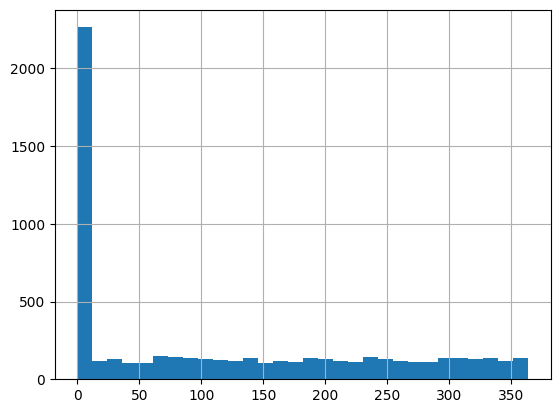

In [ ]:
#nos centramos un poco en la regla de negocio de las entradas fast pass

# Ver distribución de antelación de compra solo para errores
fastpass_errores = df_id_visitante[df_id_visitante['fastpass_fuera_rango']]

# Ver estadísticos
print(fastpass_errores['antelacion_de_compra'].describe())

#Histograma para entender como se distribuyen los tiempos de antelacion de las entradas que se denominan como FAST PASS

df_id_visitante[df_id_visitante['tipo_entrada'] == 'Pase Rápido']['antelacion_de_compra'].hist(bins=30)

In [ ]:
#corregimos los datos de las entradas fast pass Si alguien compró un
#Fast Pass con más de 3 días de antelación, lo corregimos y lo dejamos como 3 días (que es el máximo permitido por la regla de negocio)

df_id_visitante.loc[
    (df_id_visitante['tipo_entrada'] == 'Pase Rápido') &
    (df_id_visitante['antelacion_de_compra'] > 3),
    'antelacion_de_compra'
] = 3

df_id_visitante['fastpass_fuera_rango'] = (
    (df_id_visitante['tipo_entrada'] == 'Pase Rápido') &
    (df_id_visitante['antelacion_de_compra'] > 3)
)

print(df_id_visitante['fastpass_fuera_rango'].sum())

0


<ipython-input-87-948be797f7ff>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id_visitante['fastpass_fuera_rango'] = (


In [ ]:
# Cuantas filas tenemos duplicadas en el dataset en total
num_dupl = df_id_visitante.duplicated().sum()
print(num_dupl)

0


In [ ]:
#duplicados
duplicados_t_id = df_id_visitante[df_id_visitante.duplicated(subset=['t_id'], keep=False)]
duplicados_t_id

,t_id,duracion,id_visitante,procedencia,tipo_entrada,coste,antelacion_de_compra,atraccion,comienzo_atraccion,tiempo_de_espera,comienzo_atraccion_fecha_hora,duracion_excesiva,fastpass_fuera_rango,hora_atraccion,personas_hora,atraccion_saturada
20657,Training_52789098.jpg,336,469,España,Entrada Infantil,14.762603,13,Aventuras Acuáticas,478,16,2022-09-21 05:00:00,False,False,478,2.0,False
20658,Training_52789098.jpg,160,675,India,Paquete VIP,21.153139,0,Carros Chocones Divertidos,386,12,2022-09-17 09:00:00,False,False,386,2.0,False
30779,Training_8475486.jpg,346,74,España,Pase Anual,14.161830,230,Carrera de Autos Locos,529,11,2022-09-23 08:00:00,False,False,529,4.0,False
30780,Training_8475486.jpg,507,495,España,Entrada Individual,18.737504,0,Araña Saltarina,432,7,2022-09-19 07:00:00,False,False,432,2.0,False


In [ ]:
#para mantener los duplicados, creamos un nuevo indicador unico mezclando t_id + id_visitante y verificando su unicidad

df_id_visitante['id_visita_unica'] = df_id_visitante['t_id'].astype(str) + '_' + df_id_visitante['id_visitante'].astype(str)

print(df_id_visitante['id_visita_unica'].duplicated().sum())
df_id_visitante

0


<ipython-input-90-366e5b0c3bea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id_visitante['id_visita_unica'] = df_id_visitante['t_id'].astype(str) + '_' + df_id_visitante['id_visitante'].astype(str)


,t_id,duracion,id_visitante,procedencia,tipo_entrada,coste,antelacion_de_compra,atraccion,comienzo_atraccion,tiempo_de_espera,comienzo_atraccion_fecha_hora,duracion_excesiva,fastpass_fuera_rango,hora_atraccion,personas_hora,atraccion_saturada,id_visita_unica
0,PrivateTest_10072988.jpg,192,976,Chile,Pase Anual,20.854497,251,Aventuras Acuáticas,119,13,2022-09-06 06:00:00,False,False,119,2.0,False,PrivateTest_10072988.jpg_976
1,PrivateTest_10077120.jpg,374,980,Argentina,Pase Anual,20.237757,328,Barco Pirata Misterioso,325,20,2022-09-14 20:00:00,False,False,325,2.0,False,PrivateTest_10077120.jpg_980
2,PrivateTest_10086748.jpg,374,1317,Costa Rica,Entrada Familiar,10.622706,279,Cohetes Galácticos,139,13,2022-09-07 02:00:00,False,False,139,2.0,False,PrivateTest_10086748.jpg_1317
3,PrivateTest_10089743.jpg,303,1499,Colombia,Entrada Individual,21.241057,242,Vuelta al Mundo en 80 Días,658,20,2022-09-28 17:00:00,False,False,658,5.0,False,PrivateTest_10089743.jpg_1499
4,PrivateTest_10131363.jpg,388,665,España,Entrada Individual,18.730457,297,Rápido del Trueno,178,12,2022-09-08 17:00:00,False,False,178,3.0,False,PrivateTest_10131363.jpg_665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35640,Training_99984859.jpg,71,31,Argentina,Entrada Infantil,18.338205,0,Cascada Encantada,278,3,2022-09-12 21:00:00,False,False,278,2.0,False,Training_99984859.jpg_31
35641,Training_99987906.jpg,405,383,Filipinas,Pase Rápido,10.262901,0,Vuelta al Mundo en 80 Días,182,15,2022-09-08 21:00:00,False,False,182,1.0,False,Training_99987906.jpg_383
35642,Training_99988263.jpg,478,590,España,Pase Anual,16.950483,278,Mundo de las Maravillas,52,9,2022-09-03 11:00:00,False,False,52,1.0,False,Training_99988263.jpg_590
35643,Training_99996831.jpg,416,1516,Brasil,Pase Rápido,18.439771,3,Laberinto de Sueños,70,14,2022-09-04 05:00:00,False,False,70,3.0,False,Training_99996831.jpg_1516


In [ ]:
df_id_visitante['id_visitante'].nunique()

1785

# Vamos a analizar la procedencia - aparecen errores

In [ ]:
# Agrupar por visitante y contar cuántas procedencias distintas tiene cada uno
visitante_procedencias = df_id_visitante.groupby('id_visitante')['procedencia'].nunique()

# Ver cuántos visitantes tienen más de una procedencia
multiples_procedencias = visitante_procedencias[visitante_procedencias > 1]

# Mostrar resumen
print("Numero de visitantes unicos:", visitante_procedencias.shape[0])
print("ATENTO: Visitantes con múltiples procedencias:", multiples_procedencias.shape[0])

Numero de visitantes unicos: 1785
ATENTO: Visitantes con múltiples procedencias: 1742


In [ ]:
# Obtener la procedencia más frecuente (moda) por visitante
procedencia_unica = df_id_visitante.groupby('id_visitante')['procedencia'].agg(lambda x: x.mode()[0]).reset_index()

# Eliminar la columna anterior de procedencia mal asginada en el DF
df_id_visitante = df_id_visitante.drop(columns=['procedencia'])

# Volver a asignar la columna limpia
df_id_visitante = df_id_visitante.merge(procedencia_unica, on='id_visitante', how='left')
df_id_visitante.groupby('id_visitante')['procedencia'].nunique().value_counts()

,count
procedencia,
1,1785


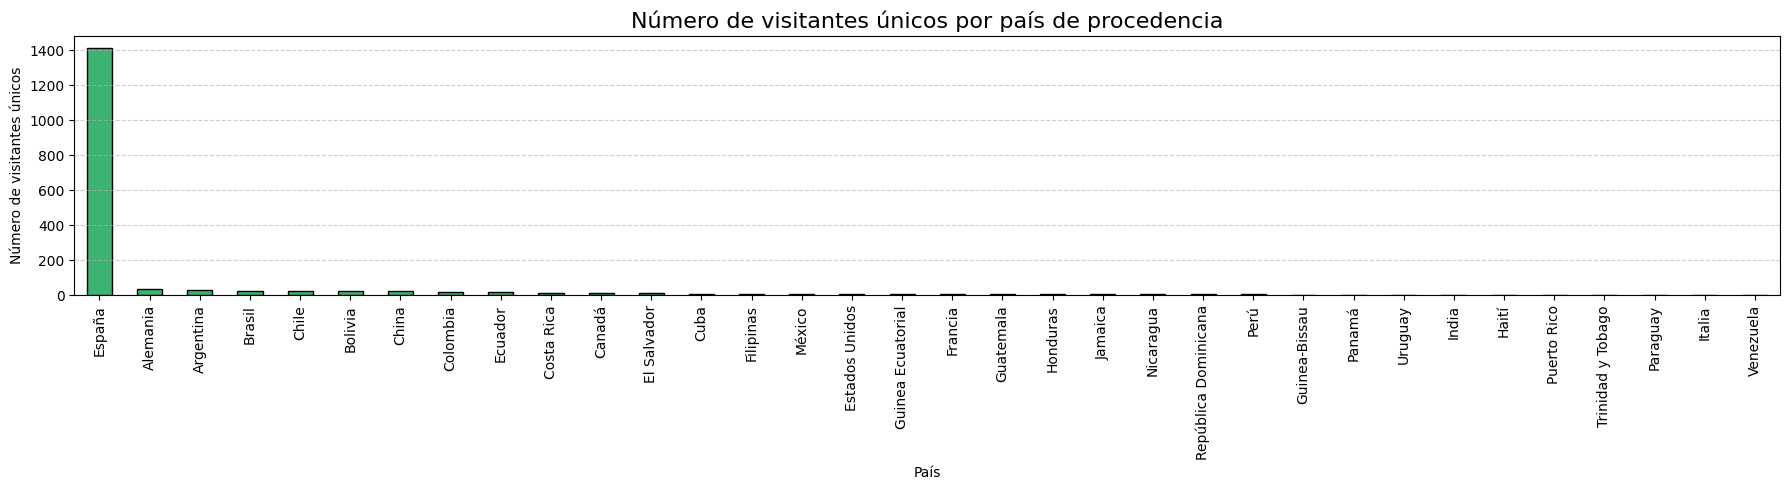

In [ ]:
# Contar visitantes únicos por país
visitantes_por_pais = df_id_visitante.groupby('procedencia')['id_visitante'].nunique().sort_values(ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(18, 5))
visitantes_por_pais.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Número de visitantes únicos por país de procedencia', fontsize=16)
plt.xlabel('País')
plt.ylabel('Número de visitantes únicos')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# 1. Calcular la media de duración por id_visitante
print(df_id_visitante.columns)
media_duracion = df_id_visitante.groupby("id_visitante")["duracion"].mean().reset_index()
media_duracion.columns = ["id_visitante", "duracion_media"]

# 2. Reemplazar todas las duraciones por la media correspondiente
df_id_visitante = df_id_visitante.drop(columns=["duracion"])  # Elimina la columna original si quieres
df_id_visitante = df_id_visitante.merge(media_duracion, on="id_visitante", how="left")  # Asocia la media a cada fila
df_id_visitante

Index(['t_id', 'duracion', 'id_visitante', 'tipo_entrada', 'coste',
       'antelacion_de_compra', 'atraccion', 'comienzo_atraccion',
       'tiempo_de_espera', 'comienzo_atraccion_fecha_hora',
       'duracion_excesiva', 'fastpass_fuera_rango', 'hora_atraccion',
       'personas_hora', 'atraccion_saturada', 'id_visita_unica',
       'procedencia'],
      dtype='object')


,t_id,id_visitante,tipo_entrada,coste,antelacion_de_compra,atraccion,comienzo_atraccion,tiempo_de_espera,comienzo_atraccion_fecha_hora,duracion_excesiva,fastpass_fuera_rango,hora_atraccion,personas_hora,atraccion_saturada,id_visita_unica,procedencia,duracion_media
0,PrivateTest_10072988.jpg,976,Pase Anual,20.854497,251,Aventuras Acuáticas,119,13,2022-09-06 06:00:00,False,False,119,2.0,False,PrivateTest_10072988.jpg_976,México,342.368421
1,PrivateTest_10077120.jpg,980,Pase Anual,20.237757,328,Barco Pirata Misterioso,325,20,2022-09-14 20:00:00,False,False,325,2.0,False,PrivateTest_10077120.jpg_980,España,365.300000
2,PrivateTest_10086748.jpg,1317,Entrada Familiar,10.622706,279,Cohetes Galácticos,139,13,2022-09-07 02:00:00,False,False,139,2.0,False,PrivateTest_10086748.jpg_1317,España,337.944444
3,PrivateTest_10089743.jpg,1499,Entrada Individual,21.241057,242,Vuelta al Mundo en 80 Días,658,20,2022-09-28 17:00:00,False,False,658,5.0,False,PrivateTest_10089743.jpg_1499,España,332.500000
4,PrivateTest_10131363.jpg,665,Entrada Individual,18.730457,297,Rápido del Trueno,178,12,2022-09-08 17:00:00,False,False,178,3.0,False,PrivateTest_10131363.jpg_665,España,350.080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35341,Training_99984859.jpg,31,Entrada Infantil,18.338205,0,Cascada Encantada,278,3,2022-09-12 21:00:00,False,False,278,2.0,False,Training_99984859.jpg_31,España,361.566667
35342,Training_99987906.jpg,383,Pase Rápido,10.262901,0,Vuelta al Mundo en 80 Días,182,15,2022-09-08 21:00:00,False,False,182,1.0,False,Training_99987906.jpg_383,España,354.676471
35343,Training_99988263.jpg,590,Pase Anual,16.950483,278,Mundo de las Maravillas,52,9,2022-09-03 11:00:00,False,False,52,1.0,False,Training_99988263.jpg_590,España,360.043478
35344,Training_99996831.jpg,1516,Pase Rápido,18.439771,3,Laberinto de Sueños,70,14,2022-09-04 05:00:00,False,False,70,3.0,False,Training_99996831.jpg_1516,Brasil,312.500000


# Vamos a ver visitantes unicos/dia

<Axes: title={'center': 'Visitantes únicos por día'}, xlabel='fecha'>

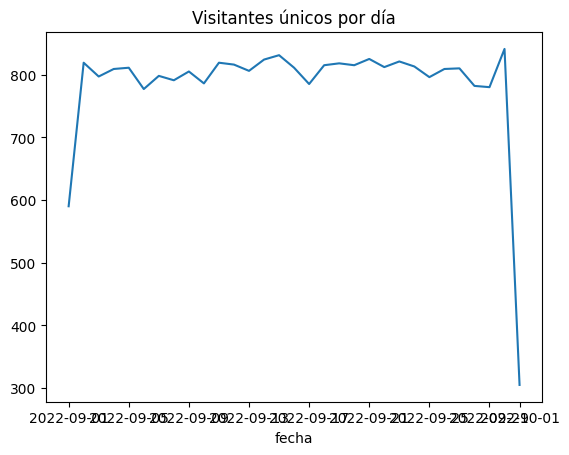

In [ ]:
df_id_visitante['fecha'] = pd.to_datetime(df_id_visitante['comienzo_atraccion_fecha_hora']).dt.date
df_id_visitante.groupby('fecha')['id_visitante'].nunique().plot(title='Visitantes únicos por día')

In [ ]:
#eliminamos las columnas booleanas, ya no hacen falta
# Lista de columnas booleanas a eliminar
columnas_booleanas = ['duracion_excesiva', 'fastpass_fuera_rango', 'atraccion_saturada']

# Eliminar del DataFrame
df_id_visitante = df_id_visitante.drop(columns=columnas_booleanas)


df_id_visitante



,t_id,id_visitante,tipo_entrada,coste,antelacion_de_compra,atraccion,comienzo_atraccion,tiempo_de_espera,comienzo_atraccion_fecha_hora,hora_atraccion,personas_hora,id_visita_unica,procedencia,duracion_media,fecha
0,PrivateTest_10072988.jpg,976,Pase Anual,20.854497,251,Aventuras Acuáticas,119,13,2022-09-06 06:00:00,119,2.0,PrivateTest_10072988.jpg_976,México,342.368421,2022-09-06
1,PrivateTest_10077120.jpg,980,Pase Anual,20.237757,328,Barco Pirata Misterioso,325,20,2022-09-14 20:00:00,325,2.0,PrivateTest_10077120.jpg_980,España,365.300000,2022-09-14
2,PrivateTest_10086748.jpg,1317,Entrada Familiar,10.622706,279,Cohetes Galácticos,139,13,2022-09-07 02:00:00,139,2.0,PrivateTest_10086748.jpg_1317,España,337.944444,2022-09-07
3,PrivateTest_10089743.jpg,1499,Entrada Individual,21.241057,242,Vuelta al Mundo en 80 Días,658,20,2022-09-28 17:00:00,658,5.0,PrivateTest_10089743.jpg_1499,España,332.500000,2022-09-28
4,PrivateTest_10131363.jpg,665,Entrada Individual,18.730457,297,Rápido del Trueno,178,12,2022-09-08 17:00:00,178,3.0,PrivateTest_10131363.jpg_665,España,350.080000,2022-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35341,Training_99984859.jpg,31,Entrada Infantil,18.338205,0,Cascada Encantada,278,3,2022-09-12 21:00:00,278,2.0,Training_99984859.jpg_31,España,361.566667,2022-09-12
35342,Training_99987906.jpg,383,Pase Rápido,10.262901,0,Vuelta al Mundo en 80 Días,182,15,2022-09-08 21:00:00,182,1.0,Training_99987906.jpg_383,España,354.676471,2022-09-08
35343,Training_99988263.jpg,590,Pase Anual,16.950483,278,Mundo de las Maravillas,52,9,2022-09-03 11:00:00,52,1.0,Training_99988263.jpg_590,España,360.043478,2022-09-03
35344,Training_99996831.jpg,1516,Pase Rápido,18.439771,3,Laberinto de Sueños,70,14,2022-09-04 05:00:00,70,3.0,Training_99996831.jpg_1516,Brasil,312.500000,2022-09-04


# Analizamos el coste de las entradas vs tipo de entrada

In [ ]:
df_id_visitante['coste'].describe()


,coste
count,35346.000000
mean,16.993831
std,4.961957
min,0.154042
25%,13.614067
50%,17.011937
75%,20.342285
max,39.326885


In [ ]:
#Vamos a usar estadistica para entender entre que valores se deberia mover nuestro coste, ya que vemos un minimo sospechoso de 0.15
#convertimos el coste a 2 decimales, ya que no es realista que tenga tantas


q1 = df_id_visitante['coste'].quantile(0.25)
q3 = df_id_visitante['coste'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Ver los que están fuera del rango típico
outliers_coste = df_id_visitante[(df_id_visitante['coste'] < limite_inferior) | (df_id_visitante['coste'] > limite_superior)]
print(limite_inferior)
print(limite_superior)

#calculamos el porcentaje de outliers de coste para ver que hacer con ellos
len(outliers_coste)
porcentaje = len(outliers_coste) / len(df_id_visitante) * 100
print(f"{porcentaje:.2f}% son outliers de coste")

3.5217389060147433
30.434612667293717
0.61% son outliers de coste


In [ ]:
#eliminamos outliers de coste
df_id_visitante = df_id_visitante[
    (df_id_visitante['coste'] >= limite_inferior) &
    (df_id_visitante['coste'] <= limite_superior)
].reset_index(drop=True)

#redondeamos
df_id_visitante['coste'] = df_id_visitante['coste'].round(2)
df_id_visitante

,t_id,id_visitante,tipo_entrada,coste,antelacion_de_compra,atraccion,comienzo_atraccion,tiempo_de_espera,comienzo_atraccion_fecha_hora,hora_atraccion,personas_hora,id_visita_unica,procedencia,duracion_media,fecha
0,PrivateTest_10072988.jpg,976,Pase Anual,20.85,251,Aventuras Acuáticas,119,13,2022-09-06 06:00:00,119,2.0,PrivateTest_10072988.jpg_976,México,342.368421,2022-09-06
1,PrivateTest_10077120.jpg,980,Pase Anual,20.24,328,Barco Pirata Misterioso,325,20,2022-09-14 20:00:00,325,2.0,PrivateTest_10077120.jpg_980,España,365.300000,2022-09-14
2,PrivateTest_10086748.jpg,1317,Entrada Familiar,10.62,279,Cohetes Galácticos,139,13,2022-09-07 02:00:00,139,2.0,PrivateTest_10086748.jpg_1317,España,337.944444,2022-09-07
3,PrivateTest_10089743.jpg,1499,Entrada Individual,21.24,242,Vuelta al Mundo en 80 Días,658,20,2022-09-28 17:00:00,658,5.0,PrivateTest_10089743.jpg_1499,España,332.500000,2022-09-28
4,PrivateTest_10131363.jpg,665,Entrada Individual,18.73,297,Rápido del Trueno,178,12,2022-09-08 17:00:00,178,3.0,PrivateTest_10131363.jpg_665,España,350.080000,2022-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35124,Training_99984859.jpg,31,Entrada Infantil,18.34,0,Cascada Encantada,278,3,2022-09-12 21:00:00,278,2.0,Training_99984859.jpg_31,España,361.566667,2022-09-12
35125,Training_99987906.jpg,383,Pase Rápido,10.26,0,Vuelta al Mundo en 80 Días,182,15,2022-09-08 21:00:00,182,1.0,Training_99987906.jpg_383,España,354.676471,2022-09-08
35126,Training_99988263.jpg,590,Pase Anual,16.95,278,Mundo de las Maravillas,52,9,2022-09-03 11:00:00,52,1.0,Training_99988263.jpg_590,España,360.043478,2022-09-03
35127,Training_99996831.jpg,1516,Pase Rápido,18.44,3,Laberinto de Sueños,70,14,2022-09-04 05:00:00,70,3.0,Training_99996831.jpg_1516,Brasil,312.500000,2022-09-04


In [ ]:
#vamos a entender como se asocia el coste al tipo de entrada
df_id_visitante.groupby('tipo_entrada')['coste'].describe()

,count,mean,std,min,25%,50%,75%,max
tipo_entrada,,,,,,,,
Entrada Familiar,5875.0,17.053937,4.816820,3.53,13.7600,17.100,20.37,30.28
Entrada Individual,5856.0,17.016101,4.806740,3.61,13.6200,17.040,20.35,30.27
Entrada Infantil,5858.0,17.002349,4.916358,3.73,13.5700,17.070,20.39,30.42
Paquete VIP,5840.0,16.980450,4.852222,3.57,13.5900,16.975,20.30,30.40
Pase Anual,5836.0,16.922764,4.795509,3.55,13.5675,16.960,20.22,30.32
Pase Rápido,5864.0,16.946209,4.850138,3.53,13.7200,16.940,20.28,30.33


In [ ]:
#calculamos la recaudacion total del parque
recaudacion_total = df_id_visitante['coste'].sum()
print(f"Recaudación total del parque: {recaudacion_total:.2f} €")

Recaudación total del parque: 596737.58 €


In [ ]:
#recaudacion por tipo de entrada
recaudacion_por_tipo = df_id_visitante.groupby('tipo_entrada')['coste'].sum().sort_values(ascending=False).round(2)
print(recaudacion_por_tipo)

tipo_entrada
Entrada Familiar      100191.88
Entrada Individual     99646.29
Entrada Infantil       99599.76
Pase Rápido            99372.57
Paquete VIP            99165.83
Pase Anual             98761.25
Name: coste, dtype: float64


# Analizamos tipo de entrada vs antelacion de compra

In [ ]:
df_id_visitante.groupby('tipo_entrada')['antelacion_de_compra'].describe(include='all')

,count,mean,std,min,25%,50%,75%,max
tipo_entrada,,,,,,,,
Entrada Familiar,5875.0,119.763745,121.787721,0.0,0.0,88.0,228.0,364.0
Entrada Individual,5856.0,120.248292,121.925918,0.0,0.0,88.0,228.0,364.0
Entrada Infantil,5858.0,118.646466,121.328891,0.0,0.0,82.0,225.0,364.0
Paquete VIP,5840.0,118.597774,120.718608,0.0,0.0,85.0,224.0,364.0
Pase Anual,5836.0,119.001714,120.843270,0.0,0.0,87.5,223.0,364.0
Pase Rápido,5864.0,2.043827,1.330813,0.0,0.0,3.0,3.0,3.0


In [ ]:
sns.pairplot(
    df_id_visitante,
    vars=["duracion_media", "coste", "antelacion_de_compra"],
    hue="tipo_entrada"
)
plt.show()